In [81]:
import json
import matplotlib.pyplot as plt
import pandas as pd

SOURCE='alive_bitwise'

# Load times from CVC4 or timeout
def load_cvc4_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    times = {}
    for theorem, entry in data.items():
        if entry['method'] == 'cvc5':
            times[theorem] = entry['total_time'] / 1000 # time is in ms
        else:
            times[theorem] = None
    return times

# Load times from E-Graph file
def load_egraph_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    return {theorem: float(entry['summary']['total_time']) for theorem, entry in data.items() if entry['summary']['stop_reason'] == {"Other":"Found equivalence"}}

# Load all three sources
file1 = f'./data/{SOURCE}/lemma/parsed.json'
file2 = f'./data/{SOURCE}/no_lemma/parsed.json'
file3 = f'./data/{SOURCE}/egraph_stats.json'

lemma_times = load_cvc4_data(file1)
no_lemma_times = load_cvc4_data(file2)
egraph_times = load_egraph_data(file3)

# Combine into a DataFrame
df = pd.DataFrame({
    'lemma': lemma_times,
    'no_lemma': no_lemma_times,
    'egraph': egraph_times
})

df = df.sort_values(by=['lemma', 'no_lemma', 'egraph'], ascending=False, na_position='first')

with open(f"./out/{SOURCE}_data.csv", "w") as f:
    f.write(df.to_csv())
df

,lemma,no_lemma,egraph
AndOrXor_2063,NaN,NaN,NaN
AndOrXor_2429,NaN,NaN,NaN
AndOrXor_2284,NaN,NaN,NaN
AndOrXor_2367,NaN,NaN,NaN
AndOrXor_1247,NaN,NaN,NaN
AndOrXor_1288,NaN,NaN,NaN
AndOrXor_144,NaN,NaN,NaN
InstCombineShift440,NaN,NaN,NaN
AndOrXor_2263,NaN,NaN,NaN
InstCombineShift279,NaN,NaN,NaN


In [82]:
latex_table = df.to_latex(
    index=True,       # include theorem names
    na_rep='-',       # replace NaNs with dashes
    float_format="%.3g"  # format floats
)

print(latex_table)
with open(f"./out/{SOURCE}_table.tex", "w") as f:
    f.write(latex_table)

\begin{tabular}{lrrr}
\toprule
 & lemma & no_lemma & egraph \\
\midrule
AndOrXor_2063 & - & - & - \\
AndOrXor_2429 & - & - & - \\
AndOrXor_2284 & - & - & - \\
AndOrXor_2367 & - & - & - \\
AndOrXor_1247 & - & - & - \\
AndOrXor_1288 & - & - & - \\
AndOrXor_144 & - & - & - \\
InstCombineShift440 & - & - & - \\
AndOrXor_2263 & - & - & - \\
InstCombineShift279 & - & - & - \\
AndOrXor_2658 & - & - & - \\
AndOrXor_2595 & - & - & - \\
AndOrXor_135 & - & - & - \\
AndOrXor_2188 & - & - & - \\
AddSub_1043 & - & - & - \\
AndOrXor_2607 & - & - & - \\
InstCombineShift476 & - & - & - \\
AndOrXor_1241 & - & - & - \\
AndOrXor_2264 & - & - & - \\
AndOrXor_2231 & - & - & - \\
AndOrXor_2123 & - & - & - \\
AndOrXor_2247 & - & - & - \\
AndOrXor_2243 & - & - & - \\
AndOrXor_2430 & - & - & - \\
AndOrXor_2297 & - & - & - \\
AndOrXor_2417 & - & - & - \\
AndOrXor_2285 & - & - & - \\
AndOrXor_2627 & - & - & - \\
AndOrXor_1253 & - & - & - \\
AndOrXor_2587 & - & - & - \\
AndOrXor_2113 & - & - & - \\
AndOrXor_1230 &

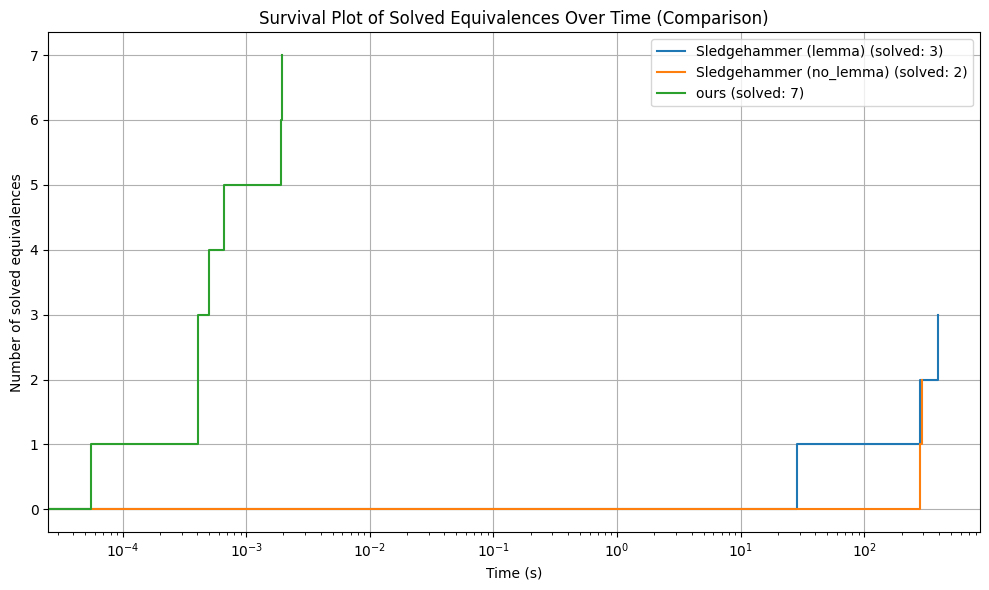

In [83]:

# Function to prepare step data for plotting
def prepare_step_data(series):
    times = sorted([t for t in series.dropna() if t is not None])
    x = [0]
    y = [0]
    for i, t in enumerate(times, start=1):
        x.extend([t, t])
        y.extend([y[-1], i])
    return x, y

# Prepare data for plotting
x1, y1 = prepare_step_data(df['lemma'])
x2, y2 = prepare_step_data(df['no_lemma'])
x3, y3 = prepare_step_data(df['egraph'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, drawstyle='steps-post', label=f'Sledgehammer (lemma) (solved: {len(df["lemma"].dropna())})')
plt.plot(x2, y2, drawstyle='steps-post', label=f'Sledgehammer (no_lemma) (solved: {len(df["no_lemma"].dropna())})')
plt.plot(x3, y3, drawstyle='steps-post', label=f'ours (solved: {len(df["egraph"].dropna())})')

plt.xlabel('Time (s)')
plt.ylabel('Number of solved equivalences')
plt.title('Survival Plot of Solved Equivalences Over Time (Comparison)')
plt.xscale('log')
# plt.ylim([0, 24])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f'./out/{SOURCE}_cactus.pdf')
plt.show()
